## My song conventions
Silent = 0, sine = 1, pulse_slow = 2, pulse_fast = 3

Note: melanogaster interpulse interval ~ 35 ms

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sys

from aux import loadmat_h5
from disp import set_font_size

cc = np.concatenate

DATA_DIR = 'data/original/wt_gold/wt'
FPS = 150
DT = 1/FPS

MIN_GAP = int(np.round(.075/DT))

MAX_EXPTS = None

In [2]:
expts = []
for x in os.listdir(DATA_DIR):
    if x.endswith('.h5') and not(x.startswith('testing')):
        expts.append(x)
expts = sorted(expts)
print(f'All experiments (n = {len(expts)}):')
[print(f'{cexpt}: {expt}') for cexpt, expt in enumerate(expts)];

All experiments (n = 84):
0: 190612_110405_wt_16276625_rig2.1.h5
1: 190612_110405_wt_18159111_rig2.2.h5
2: 190612_110639_wt_18159211_rig1.1.h5
3: 190612_110953_wt_18159112_rig3.2.h5
4: 190612_110953_wt_18159203_rig3.1.h5
5: 190613_095814_wt_16276625_rig2.1.h5
6: 190613_100053_wt_18159206_rig1.2.h5
7: 190619_103019_wt_18159111_rig2.2.h5
8: 190619_103446_wt_18159206_rig1.2.h5
9: 190619_103820_wt_18159112_rig3.2.h5
10: 190718_104807_wt_18159112_rig3.2.h5
11: 190718_104807_wt_18159203_rig3.1.h5
12: 190718_110328_wt_18159203_rig3.1.h5
13: 190719_085355_wt_18159112_rig3.2.h5
14: 190719_085355_wt_18159203_rig3.1.h5
15: 190719_085631_wt_16276625_rig2.1.h5
16: 190719_090330_wt_18159206_rig1.2.h5
17: 190719_091945_wt_18159206_rig1.2.h5
18: 190719_093704_wt_16276625_rig2.1.h5
19: 190719_094414_wt_18159112_rig3.2.h5
20: 190723_102650_wt_18159206_rig1.2.h5
21: 190723_102650_wt_18159211_rig1.1.h5
22: 190723_103019_wt_16276625_rig2.1.h5
23: 190723_103019_wt_18159111_rig2.2.h5
24: 190724_103424_wt_181

# Basic data parameters

In [3]:
FPS = 150  # Hz (property of data, don't change)
DT = 1/FPS  # sec

# Load trials

In [4]:
songs = []
ffvs = []
ffas = []
flss = []
frss = []
fmfvs = []
fmlss = []

In [5]:
for expt in expts[:MAX_EXPTS]:
    sys.stdout.write('.')
    d = loadmat_h5(os.path.join(DATA_DIR, expt))
    n_t = len(d['fFV'])
    
    d['sine_lims_150'] = d['frame_at_sample'][d['sine_lims'].astype(int)].astype(int)  # sine limits at 150 fps
    d['pslow_lims_150'] = d['frame_at_sample'][d['pslow_lims'].astype(int)].astype(int)  # pslow limits at 150 fps
    d['pfast_lims_150'] = d['frame_at_sample'][d['pfast_lims'].astype(int)].astype(int)  # pfast limits at 150 fps
    
    if not ((d['sine_lims_150'].size == 0) and (d['pslow_lims_150'].size == 0) and (d['pfast_lims_150'].size == 0)):
        sys.stdout.write('-')
        assert np.max(cc([d['sine_lims_150'], d['pslow_lims_150'], d['pfast_lims_150']], axis=1)) <= n_t
    else:
        sys.stdout.write('x')
    
    s = np.zeros(len(d['mFV']), dtype=int)  # song
    for istart, iend in d['sine_lims_150'].T:
        s[istart:iend] = 1

    for istart, iend in d['pslow_lims_150'].T:
        s[istart:iend] = 2

    for istart, iend in d['pfast_lims_150'].T:
        s[istart:iend] = 3

    songs.append(s)
    
    ffvs.append(d['fFV'])
    ffas.append(d['fFA'])
    flss.append(np.abs(d['fLS']))
    frss.append(np.abs(d['fRS']))
    fmfvs.append(d['fmFV'])
    fmlss.append(d['fmLS'])

.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.x.-.-.-.-.-.-

# Examples

In [6]:
# convert to data frames
cols = ['ID', 'FRAME', 'T', 'Q', 'S', 'P', 'F', 'FFV', 'FFA', 'FLS', 'FRS', 'FMFV', 'FMLS']
dfs = []
for ctr in range(len(songs)):
    df = pd.DataFrame({
        'ID': np.repeat(ctr, len(songs[ctr])),
        'FRAME': np.arange(len(songs[ctr]), dtype=int),
        'T': np.arange(len(songs[ctr]))/FPS,
        'Q': (songs[ctr] == 0).astype(int),
        'S': (songs[ctr] == 1).astype(int),
        'P': (songs[ctr] == 2).astype(int),
        'F': (songs[ctr] == 3).astype(int),
        'FFV': ffvs[ctr],
        'FFA': ffas[ctr],
        'FLS': flss[ctr],
        'FRS': frss[ctr],
        'FMFV': fmfvs[ctr],
        'FMLS': fmlss[ctr],
    })
    dfs.append(df)

In [7]:
df_cc = pd.concat(dfs, ignore_index=True)
df_cc

,ID,FRAME,T,Q,S,P,F,FFV,FFA,FLS,FRS,FMFV,FMLS
0,0,0,0.000000,1,0,0,0,3.005674,2.058972,0.464674,3.970362,2.759047,1.279711
1,0,1,0.006667,1,0,0,0,5.064646,-1.111705,0.591069,3.970362,4.680042,2.024156
2,0,2,0.013333,1,0,0,0,3.952941,-0.108571,0.611765,4.132553,3.268321,2.306095
3,0,3,0.020000,1,0,0,0,3.844370,-0.491905,1.212772,3.438263,4.007411,0.436646
4,0,4,0.026667,1,0,0,0,3.352465,-1.040417,1.327018,0.000000,3.601223,0.176610
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11654473,83,55071,367.140000,1,0,0,0,-0.901992,0.901992,0.660614,2.291984,0.942093,0.602047
11654474,83,55072,367.146667,1,0,0,0,0.000000,-1.117392,0.000000,1.403489,0.000000,0.000000
11654475,83,55073,367.153333,1,0,0,0,-1.117392,1.117392,0.037878,1.403489,1.108938,0.142324
11654476,83,55074,367.160000,1,0,0,0,0.000000,0.000000,0.000000,1.811927,0.000000,0.000000


In [8]:
df_cc.to_csv('data/simple/w_song_f_behav_up.csv', index=False)

In [9]:
# test whether save was done correctly
df_load = pd.read_csv('data/simple/w_song_f_behav_up.csv')
df_load

,ID,FRAME,T,Q,S,P,F,FFV,FFA,FLS,FRS,FMFV,FMLS
0,0,0,0.000000,1,0,0,0,3.005674,2.058972,0.464674,3.970362,2.759047,1.279711
1,0,1,0.006667,1,0,0,0,5.064646,-1.111705,0.591069,3.970362,4.680042,2.024156
2,0,2,0.013333,1,0,0,0,3.952941,-0.108571,0.611765,4.132553,3.268321,2.306095
3,0,3,0.020000,1,0,0,0,3.844370,-0.491905,1.212772,3.438263,4.007411,0.436646
4,0,4,0.026667,1,0,0,0,3.352465,-1.040417,1.327018,0.000000,3.601223,0.176610
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11654473,83,55071,367.140000,1,0,0,0,-0.901992,0.901992,0.660614,2.291984,0.942093,0.602047
11654474,83,55072,367.146667,1,0,0,0,0.000000,-1.117392,0.000000,1.403489,0.000000,0.000000
11654475,83,55073,367.153333,1,0,0,0,-1.117392,1.117392,0.037878,1.403489,1.108938,0.142324
11654476,83,55074,367.160000,1,0,0,0,0.000000,0.000000,0.000000,1.811927,0.000000,0.000000


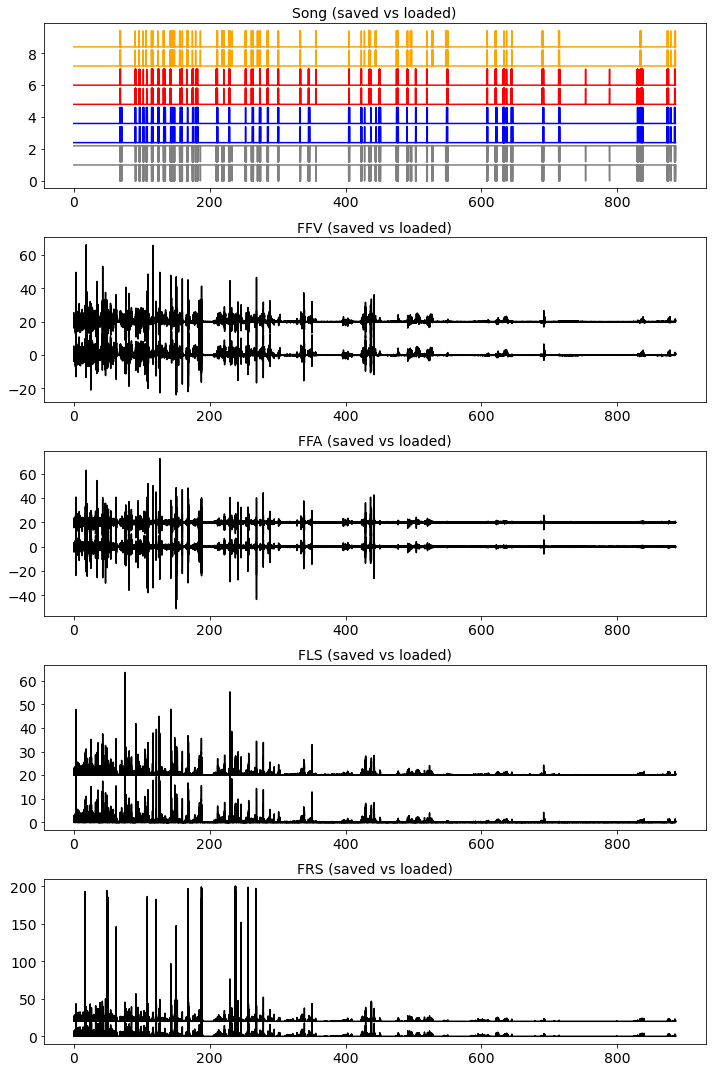

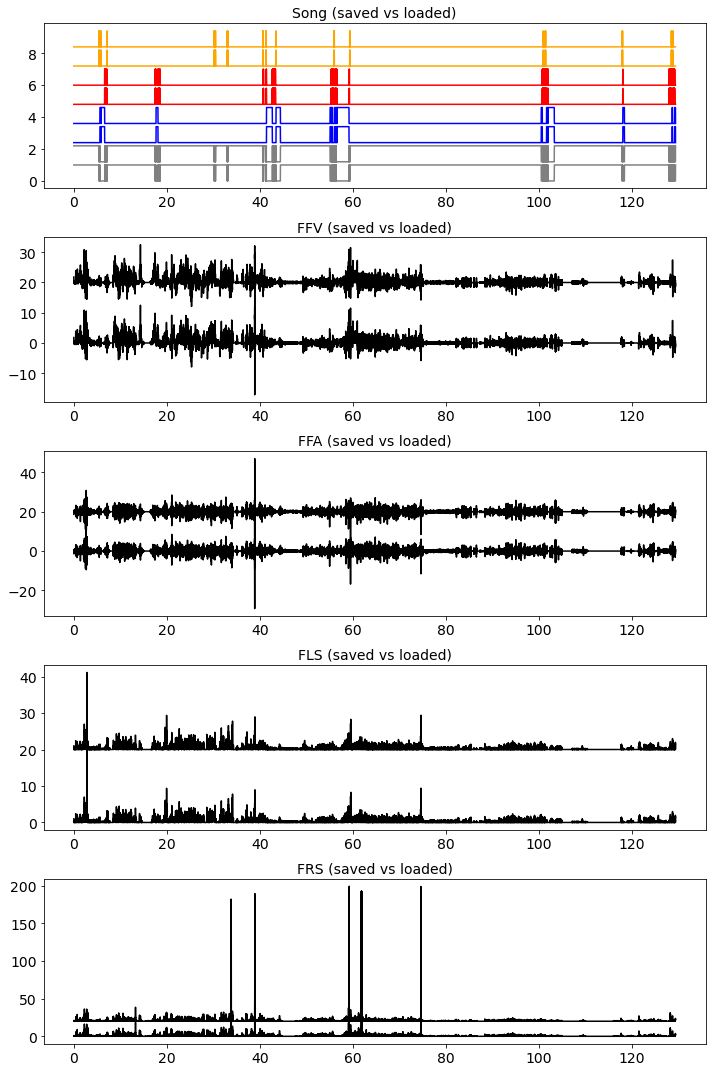

In [10]:
for ID in [3, 10]:
    fig, axs = plt.subplots(5, 1, figsize=(10, 15), tight_layout=True)
    axs[0].plot(df_cc[df_cc.ID == ID]['T'], df_cc[df_cc.ID == ID].Q, c='gray')
    axs[0].plot(df_load[df_load.ID == ID]['T'], df_load[df_load.ID == ID].Q + 1.2, c='gray')
    axs[0].plot(df_cc[df_cc.ID == ID]['T'], df_cc[df_cc.ID == ID].S + 2.4, c='b')
    axs[0].plot(df_load[df_load.ID == ID]['T'], df_load[df_load.ID == ID].S + 3.6, c='b')
    axs[0].plot(df_cc[df_cc.ID == ID]['T'], df_cc[df_cc.ID == ID].P + 4.8, c='r')
    axs[0].plot(df_load[df_load.ID == ID]['T'], df_load[df_load.ID == ID].P + 6, c='r')
    axs[0].plot(df_cc[df_cc.ID == ID]['T'], df_cc[df_cc.ID == ID].F + 7.2, c='orange')
    axs[0].plot(df_load[df_load.ID == ID]['T'], df_load[df_load.ID == ID].F + 8.4, c='orange')
    axs[0].set_title('Song (saved vs loaded)')
    
    axs[1].plot(df_cc[df_cc.ID == ID]['T'], df_cc[df_cc.ID == ID]['FFV'], c='k')
    axs[1].plot(df_load[df_load.ID == ID]['T'], df_load[df_load.ID == ID]['FFV'] + 20, c='k')
    axs[1].set_title('FFV (saved vs loaded)')
    
    axs[2].plot(df_cc[df_cc.ID == ID]['T'], df_cc[df_cc.ID == ID]['FFA'], c='k')
    axs[2].plot(df_load[df_load.ID == ID]['T'], df_load[df_load.ID == ID]['FFA'] + 20, c='k')
    axs[2].set_title('FFA (saved vs loaded)')
    
    axs[3].plot(df_cc[df_cc.ID == ID]['T'], df_cc[df_cc.ID == ID]['FLS'], c='k')
    axs[3].plot(df_load[df_load.ID == ID]['T'], df_load[df_load.ID == ID]['FLS'] + 20, c='k')
    axs[3].set_title('FLS (saved vs loaded)')
    
    axs[4].plot(df_cc[df_cc.ID == ID]['T'], df_cc[df_cc.ID == ID]['FRS'], c='k')
    axs[4].plot(df_load[df_load.ID == ID]['T'], df_load[df_load.ID == ID]['FRS'] + 20, c='k')
    axs[4].set_title('FRS (saved vs loaded)')
    
    set_font_size(axs, 14)

Delete everything below when done running:

# Downsample the WT Gold data to 30 fps

In [1]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

from disp import set_plot

NTR = 84
FPS_UP = 150
FPS_DN = 30.03
DT_DN = 1/FPS_DN

df_up = pd.read_csv('data/simple/w_song_f_behav_up.csv')
df_up

,ID,FRAME,T,Q,S,P,F,FFV,FFA,FLS,FRS,FMFV,FMLS
0,0,0,0.000000,1,0,0,0,3.005674,2.058972,0.464674,3.970362,2.759047,1.279711
1,0,1,0.006667,1,0,0,0,5.064646,-1.111705,0.591069,3.970362,4.680042,2.024156
2,0,2,0.013333,1,0,0,0,3.952941,-0.108571,0.611765,4.132553,3.268321,2.306095
3,0,3,0.020000,1,0,0,0,3.844370,-0.491905,1.212772,3.438263,4.007411,0.436646
4,0,4,0.026667,1,0,0,0,3.352465,-1.040417,1.327018,0.000000,3.601223,0.176610
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11654473,83,55071,367.140000,1,0,0,0,-0.901992,0.901992,0.660614,2.291984,0.942093,0.602047
11654474,83,55072,367.146667,1,0,0,0,0.000000,-1.117392,0.000000,1.403489,0.000000,0.000000
11654475,83,55073,367.153333,1,0,0,0,-1.117392,1.117392,0.037878,1.403489,1.108938,0.142324
11654476,83,55074,367.160000,1,0,0,0,0.000000,0.000000,0.000000,1.811927,0.000000,0.000000


In [2]:
dfs_tr_up = [df_up[df_up['ID'] == ctr] for ctr in range(NTR)]

In [3]:
# loop over trials and downsample via moving average
dfs_tr_dn = []
for ctr, df_tr_up in enumerate(dfs_tr_up):
    sys.stdout.write('.')
    t_up = np.array(df_tr_up['T'])
    t_max = t_up[-1]
    
    t = np.arange(0, t_max, DT_DN)
    q = np.zeros(len(t), dtype=int)
    s = np.zeros(len(t), dtype=int)
    p = np.zeros(len(t), dtype=int)
    f = np.zeros(len(t), dtype=int)
    
    ffv = np.nan * np.zeros(len(t))
    ffa = np.nan * np.zeros(len(t))
    fls = np.nan * np.zeros(len(t))
    frs = np.nan * np.zeros(len(t))
    fmfv = np.nan * np.zeros(len(t))
    fmls = np.nan * np.zeros(len(t))
    
    for ct, t_start in enumerate(t):
        t_end = t_start + DT_DN
        mt = (t_start <= t_up) & (t_up < t_end)
        
        # get which song mode dominates in this time window
        ct_q = np.sum(df_tr_up['Q'][mt])
        ct_s = np.sum(df_tr_up['S'][mt])
        ct_p = np.sum(df_tr_up['P'][mt])
        ct_f = np.sum(df_tr_up['F'][mt])
        
        if ct_s == 0 and ct_p == 0 and ct_f == 0:
            # only call time point quiet if no sine or pulse at all
            imode = 0
        else:
            # otherwise find dominant mode
            imode = np.argmax([-np.inf, ct_s, ct_p, ct_f])
            
        if imode == 0:
            q[ct] = 1
        elif imode == 1:
            s[ct] = 1
        elif imode == 2:
            p[ct] = 1
        elif imode == 3:
            f[ct] = 1
            
        # take mean of fbehav vars
        ffv[ct] = np.array(df_tr_up['FFV'])[mt].mean()
        ffa[ct] = np.array(df_tr_up['FFA'])[mt].mean()
        fls[ct] = np.array(df_tr_up['FLS'])[mt].mean()
        frs[ct] = np.array(df_tr_up['FRS'])[mt].mean()
        fmfv[ct] = np.array(df_tr_up['FMFV'])[mt].mean()
        fmls[ct] = np.array(df_tr_up['FMLS'])[mt].mean()
        
    df_tr_dn = pd.DataFrame(
        columns=['ID', 'FRAME', 'T', 'Q', 'S', 'P', 'F', 'FFV', 'FFA', 'FLS', 'FRS', 'FMFV', 'FMLS'],
        data={
            'ID': np.repeat(ctr, len(t)),
            'FRAME': np.arange(len(t)),
            'T': t,
            'Q': q,
            'S': s,
            'P': p,
            'F': f,
            'FFV': ffv,
            'FFA': ffa,
            'FLS': fls,
            'FRS': frs,
            'FMFV': fmfv,
            'FMLS': fmls,
        })

    dfs_tr_dn.append(df_tr_dn)

....................................................................................

In [4]:
# concatenate and save dataframes
df_dn = pd.concat(dfs_tr_dn)
df_dn.to_csv('data/simple/w_song_f_behav.csv', index=False)

In [5]:
# load down sampled data and plot atop original
df_dn_reloaded = pd.read_csv('data/simple/w_song_f_behav.csv')
dfs_tr_dn_reloaded = [df_dn_reloaded[df_dn_reloaded['ID'] == ctr] for ctr in range(NTR)]
df_dn_reloaded

,ID,FRAME,T,Q,S,P,F,FFV,FFA,FLS,FRS,FMFV,FMLS
0,0,0,0.000000,1,0,0,0,3.844019,-0.138725,0.841459,3.102308,3.663209,1.244644
1,0,1,0.033300,1,0,0,0,2.645045,0.217158,0.958827,1.644406,2.143699,1.633865
2,0,2,0.066600,1,0,0,0,2.817165,-0.170636,0.799927,0.591572,2.212304,1.895512
3,0,3,0.099900,1,0,0,0,4.238035,0.000825,0.455475,0.842094,3.535255,2.372842
4,0,4,0.133200,1,0,0,0,6.156643,0.280813,0.516347,1.218568,5.392901,2.986841
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333241,83,11022,367.032967,0,0,0,1,-0.058612,0.000000,0.240739,0.721101,0.063511,0.234946
2333242,83,11023,367.066267,0,0,0,1,0.381769,0.000000,0.156364,0.000000,-0.366270,0.191376
2333243,83,11024,367.099567,0,0,0,1,0.196337,0.000000,0.482724,0.839733,-0.179289,0.481899
2333244,83,11025,367.132867,1,0,0,0,-0.403877,0.000000,0.139698,1.868385,0.410206,0.148874


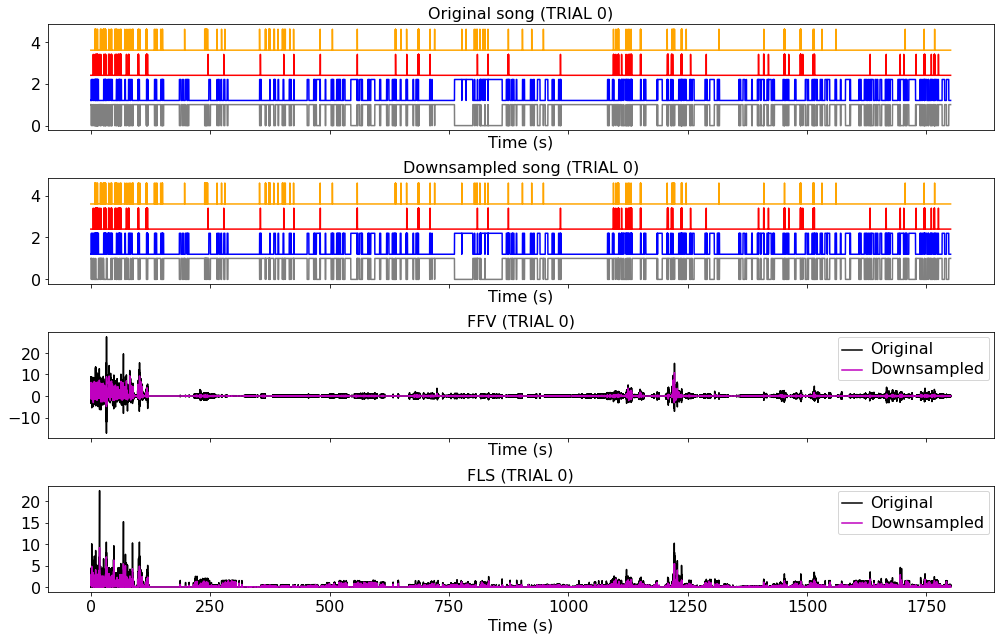

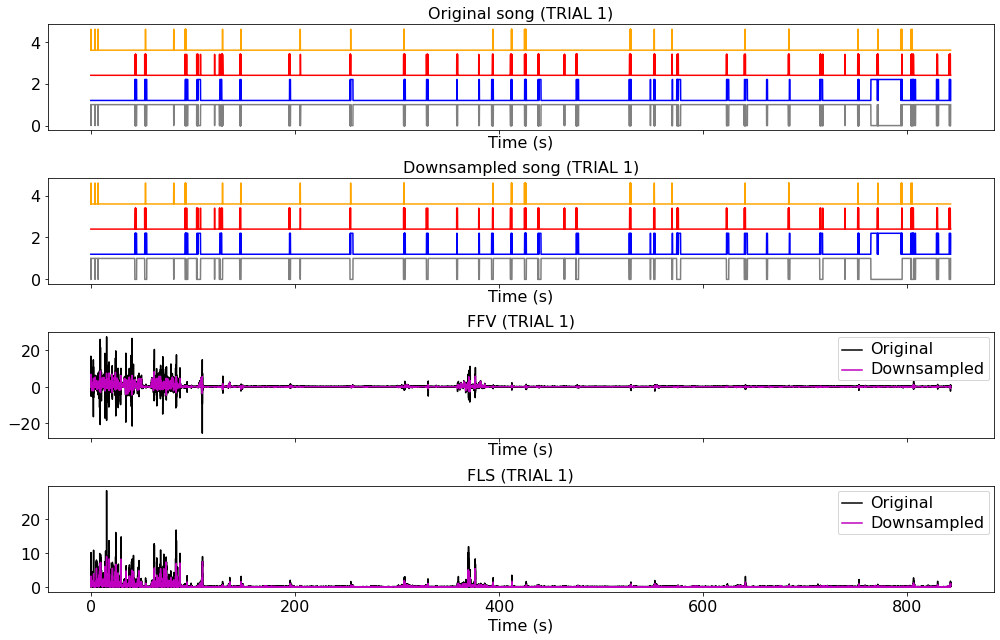

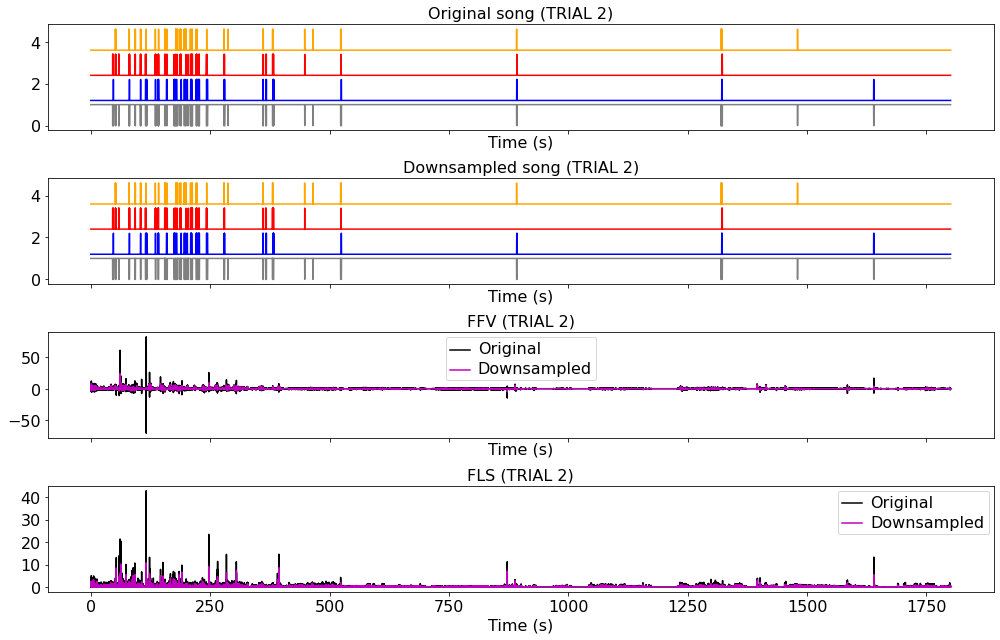

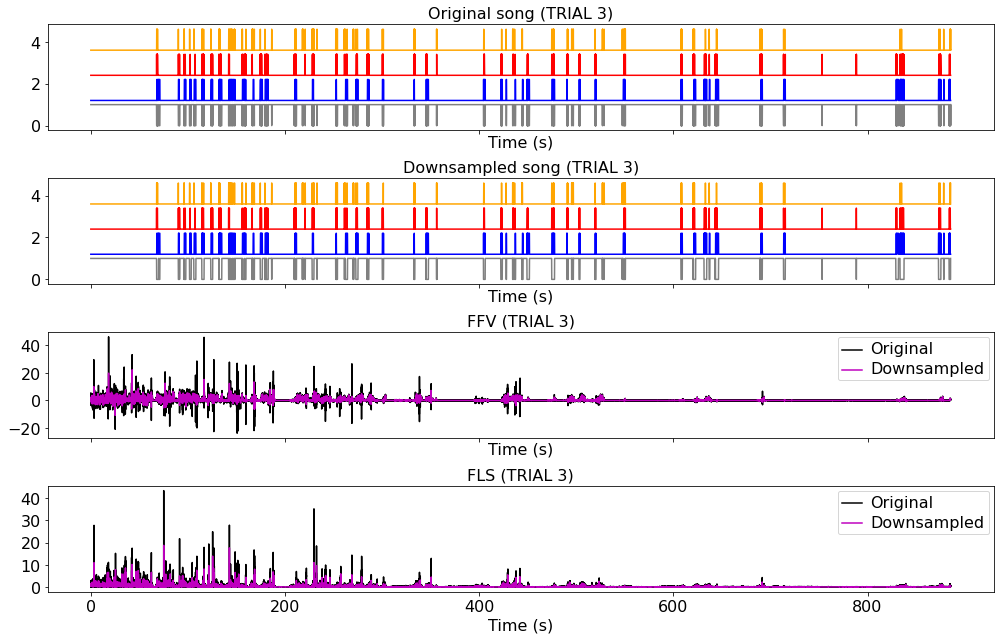

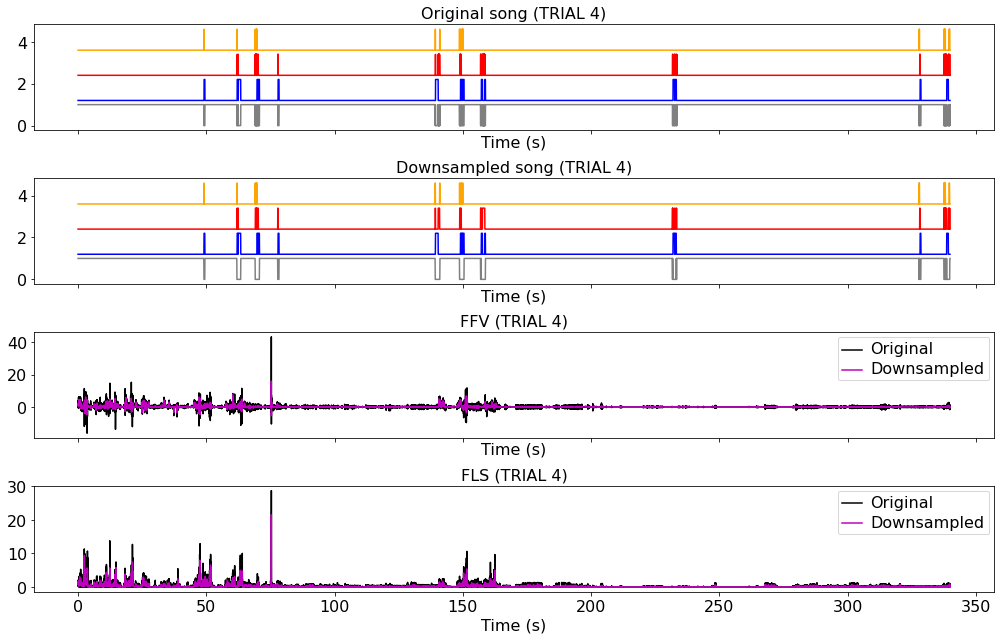

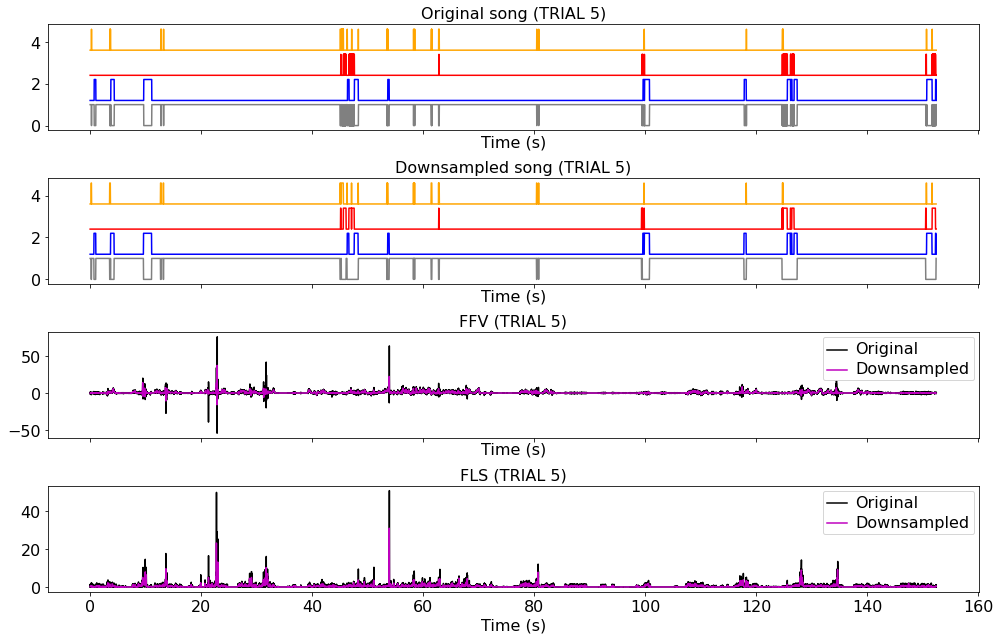

In [6]:
for ctr in range(6):
    fig, axs = plt.subplots(4, 1, figsize=(14, 9), tight_layout=True, sharex=True)
    
    t_up = dfs_tr_up[ctr]['T']
    q_up = dfs_tr_up[ctr]['Q']
    s_up = dfs_tr_up[ctr]['S']
    p_up = dfs_tr_up[ctr]['P']
    f_up = dfs_tr_up[ctr]['F']
    
    ffv_up = dfs_tr_up[ctr]['FFV']
    fls_up = dfs_tr_up[ctr]['FLS']
    
    t_dn = dfs_tr_dn_reloaded[ctr]['T']
    q_dn = dfs_tr_dn_reloaded[ctr]['Q']
    s_dn = dfs_tr_dn_reloaded[ctr]['S']
    p_dn = dfs_tr_dn_reloaded[ctr]['P']
    f_dn = dfs_tr_dn_reloaded[ctr]['F']
    
    ffv_dn = dfs_tr_dn_reloaded[ctr]['FFV']
    fls_dn = dfs_tr_dn_reloaded[ctr]['FLS']
    
    axs[0].plot(t_up, q_up, color='gray')
    axs[0].plot(t_up, s_up+1.2, color='b')
    axs[0].plot(t_up, p_up+2.4, color='r')
    axs[0].plot(t_up, f_up+3.6, color='orange')
    axs[0].set_title(f'Original song (TRIAL {ctr})')
    
    axs[1].plot(t_dn, q_dn, color='gray')
    axs[1].plot(t_dn, s_dn+1.2, color='b')
    axs[1].plot(t_dn, p_dn+2.4, color='r')
    axs[1].plot(t_dn, f_dn+3.6, color='orange')
    axs[1].set_title(f'Downsampled song (TRIAL {ctr})')
    
    axs[2].plot(t_up, ffv_up, c='k')
    axs[2].plot(t_dn, ffv_dn, c='m')
    axs[2].set_title(f'FFV (TRIAL {ctr})')
    axs[2].legend(['Original', 'Downsampled'])
    
    axs[3].plot(t_up, fls_up, c='k')
    axs[3].plot(t_dn, fls_dn, c='m')
    axs[3].set_title(f'FLS (TRIAL {ctr})')
    axs[3].legend(['Original', 'Downsampled'])
    
    for ax in axs:
        set_plot(ax, x_label='Time (s)', font_size=16)

Zoom in on specific song window

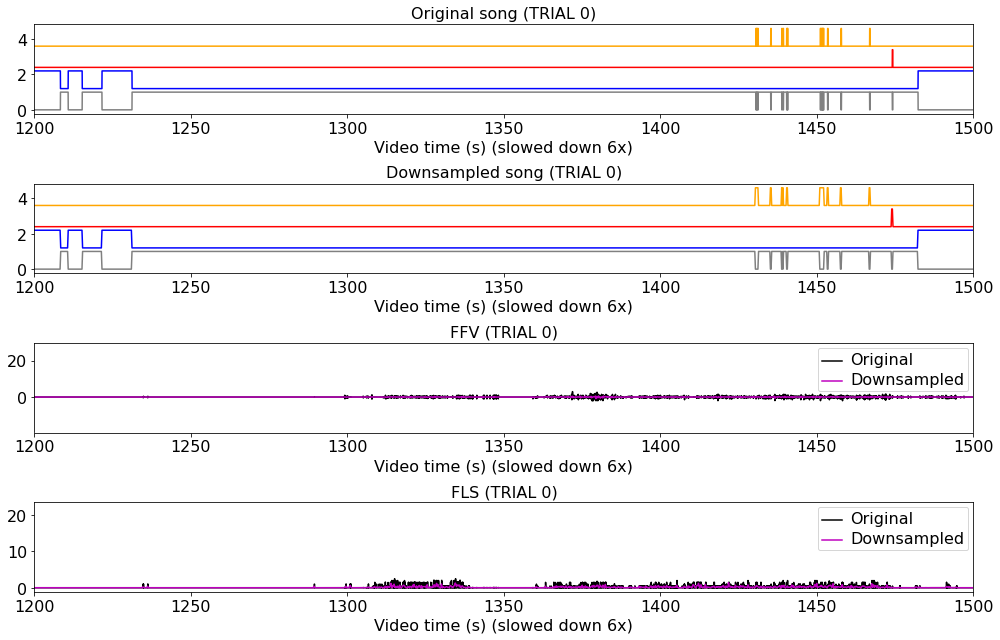

In [7]:
ctr = 0
fig, axs = plt.subplots(4, 1, figsize=(14, 9), tight_layout=True)

t_up = dfs_tr_up[ctr]['T']
q_up = dfs_tr_up[ctr]['Q']
s_up = dfs_tr_up[ctr]['S']
p_up = dfs_tr_up[ctr]['P']
f_up = dfs_tr_up[ctr]['F']

ffv_up = dfs_tr_up[ctr]['FFV']
fls_up = dfs_tr_up[ctr]['FLS']

t_dn = dfs_tr_dn_reloaded[ctr]['T']
q_dn = dfs_tr_dn_reloaded[ctr]['Q']
s_dn = dfs_tr_dn_reloaded[ctr]['S']
p_dn = dfs_tr_dn_reloaded[ctr]['P']
f_dn = dfs_tr_dn_reloaded[ctr]['F']

ffv_dn = dfs_tr_dn_reloaded[ctr]['FFV']
fls_dn = dfs_tr_dn_reloaded[ctr]['FLS']

axs[0].plot(t_up*6, q_up, color='gray')
axs[0].plot(t_up*6, s_up+1.2, color='b')
axs[0].plot(t_up*6, p_up+2.4, color='r')
axs[0].plot(t_up*6, f_up+3.6, color='orange')
axs[0].set_title(f'Original song (TRIAL {ctr})')

axs[1].plot(t_dn*6, q_dn, color='gray')
axs[1].plot(t_dn*6, s_dn+1.2, color='b')
axs[1].plot(t_dn*6, p_dn+2.4, color='r')
axs[1].plot(t_dn*6, f_dn+3.6, color='orange')
axs[1].set_title(f'Downsampled song (TRIAL {ctr})')

axs[2].plot(t_up*6, ffv_up, c='k')
axs[2].plot(t_dn*6, ffv_dn, c='m')
axs[2].set_title(f'FFV (TRIAL {ctr})')
axs[2].legend(['Original', 'Downsampled'])

axs[3].plot(t_up*6, fls_up, c='k')
axs[3].plot(t_dn*6, fls_dn, c='m')
axs[3].set_title(f'FLS (TRIAL {ctr})')
axs[3].legend(['Original', 'Downsampled'])

for ax in axs:
    ax.set_xlim(1200,1500)
    set_plot(ax, x_label='Video time (s) (slowed down 6x)', font_size=16)

# Create files with additionally processed female behavioral variables

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from scipy import signal
import sys

from disp import plot_b, set_plot

IDX_OFFSET = 276
NTR = 84
FPS = 30.03
DT = 1/FPS
SONG_FILE = 'data/simple/w_song_f_behav.csv'
SAVE_DIR = 'data/simple/behav_xtd'

if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)

In [9]:
# functions for computing female behavioral variables
def fwd_mean(x, wdw):
    # forward mean
    iwdw = int(round(wdw/DT))
    h_rect = np.ones(iwdw)/iwdw
    return signal.fftconvolve(x, h_rect, mode='full')[-len(x):]

def fwd_sd(x, wdw):
    # forward std
    iwdw = int(round(wdw/DT))
    x_mat = np.nan * np.zeros((len(x), min(iwdw, len(x))))
    for cstep in range(min(iwdw, len(x))):
        x_mat[:len(x)-cstep, cstep] = x[cstep:]
    return np.nanstd(x_mat, axis=1)

In [10]:
df_load = pd.read_csv(SONG_FILE)
df_trs = [df_load[df_load['ID'] == ctr] for ctr in range(NTR)]

In [11]:
wdws = [.03, .1, .5, 1, 2, 5, 10, 30, 60, 120, 300, 600, 1200]

for ctr, df_tr in enumerate(df_trs):
    sys.stdout.write('.')
    tr_data = {}
    
    ffv = np.array(df_tr['FFV'])  # for vel
    fls = np.array(df_tr['FLS'])  # lat vel
    mtn = np.sqrt(ffv**2 + fls**2)  # total motion 
    
    fmfv = np.array(df_tr['FMFV'])  # for vel twd M
    fmls = np.array(df_tr['FMLS'])  # for vel twd M
    
    # compute forward means
    for wdw in wdws:
        tr_data[f'FFV_MN_{wdw}'] = fwd_mean(ffv, wdw)
        tr_data[f'FLS_MN_{wdw}'] = fwd_mean(fls, wdw)
        tr_data[f'MTN_MN_{wdw}'] = fwd_mean(mtn, wdw)
        tr_data[f'FMFV_MN_{wdw}'] = fwd_mean(fmfv, wdw)
        tr_data[f'FMLS_MN_{wdw}'] = fwd_mean(fmls, wdw)
        
    # compute forward stds
    for wdw in wdws[1:]:
        tr_data[f'FFV_SD_{wdw}'] = fwd_sd(ffv, wdw)
        tr_data[f'FLS_SD_{wdw}'] = fwd_sd(fls, wdw)
        tr_data[f'MTN_SD_{wdw}'] = fwd_sd(mtn, wdw)
        tr_data[f'FMFV_SD_{wdw}'] = fwd_sd(fmfv, wdw)
        tr_data[f'FMLS_SD_{wdw}'] = fwd_sd(fmls, wdw)

    columns = ['ID', 'FRAME', 'T'] + list(sorted(tr_data.keys()))
    tr_data['ID'] = df_tr['ID']
    tr_data['FRAME'] = df_tr['FRAME']
    tr_data['T'] = df_tr['T']
    
    df_xtd = pd.DataFrame(columns=columns, data=tr_data)
    
    df_xtd.to_csv(os.path.join(SAVE_DIR, f'behav_xtd_tr_{ctr+IDX_OFFSET}.csv'), index=False)

....................................................................................

# Plot example trials and smoothed variables

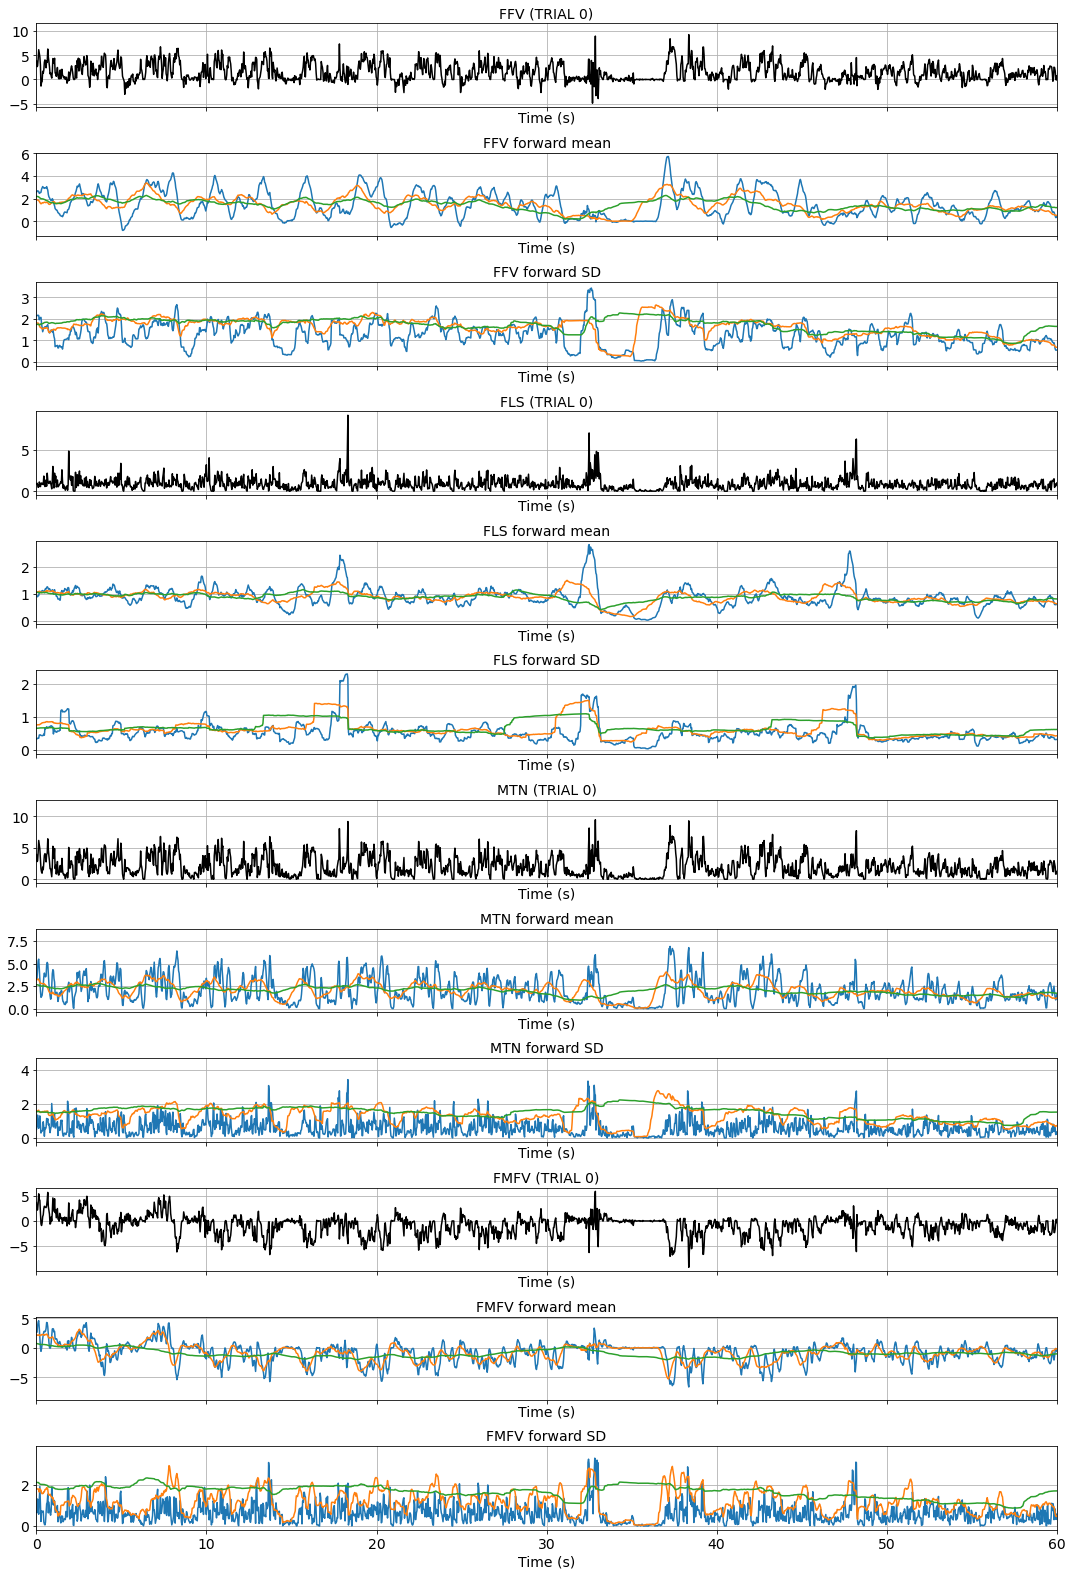

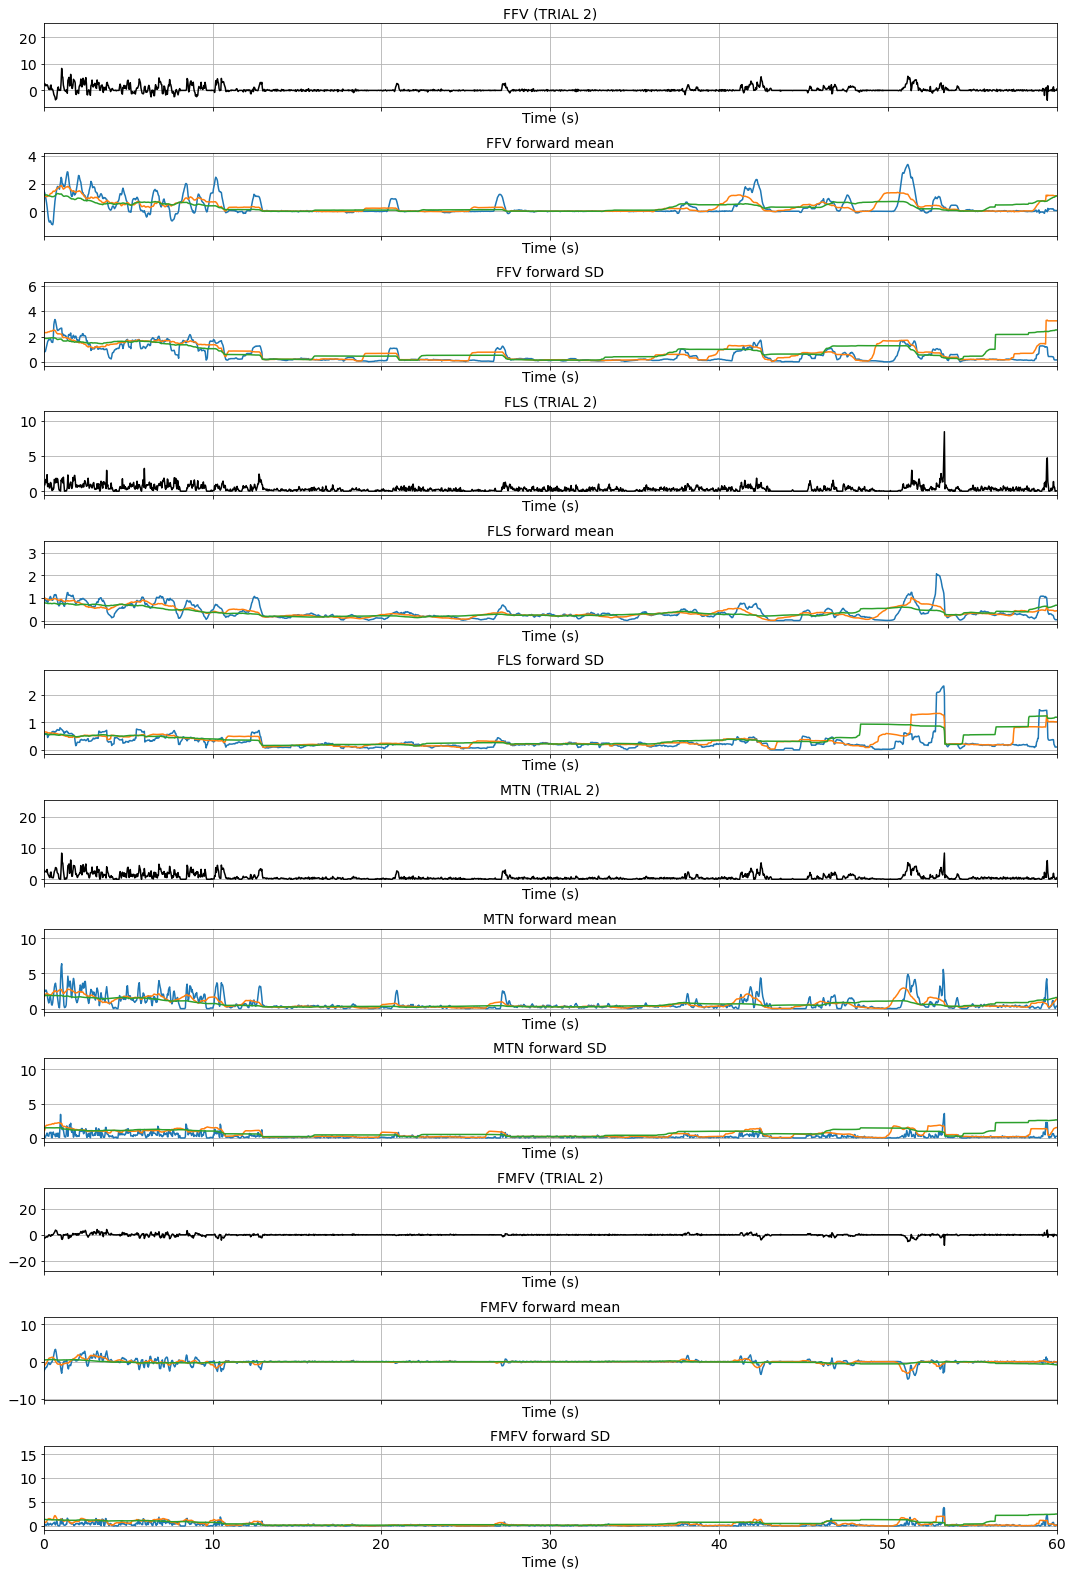

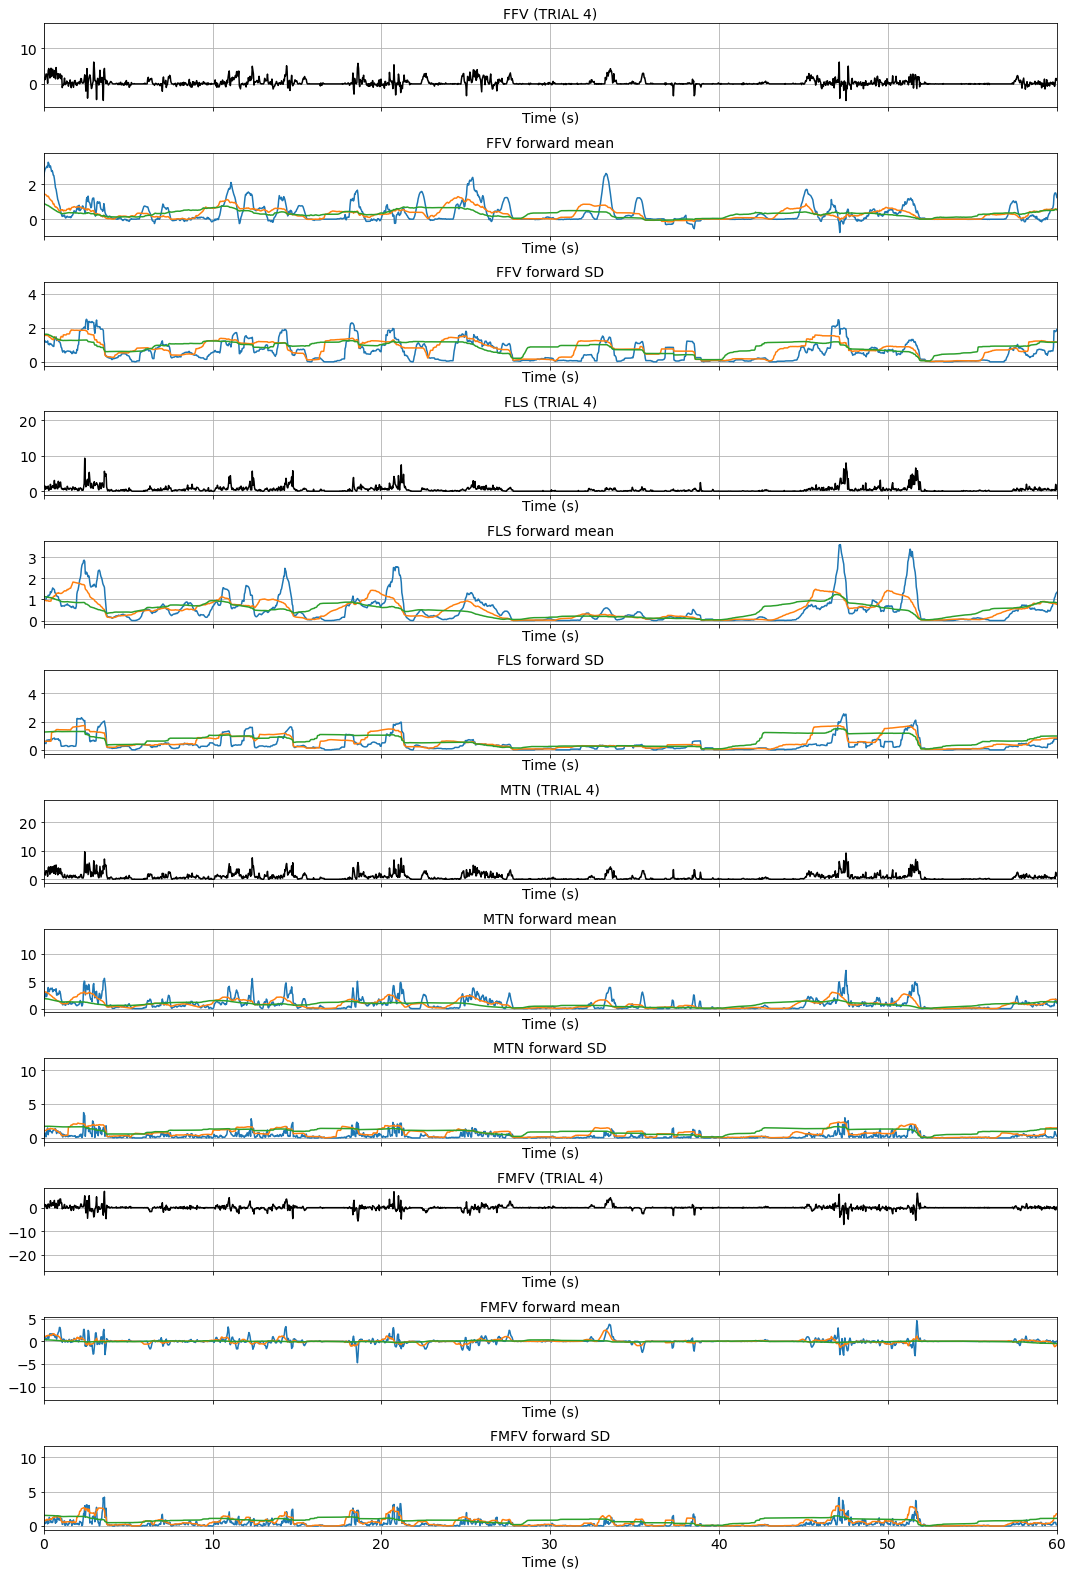

In [12]:
IXPL = [0, 2, 4]

for ixpl in IXPL:
    df_xtd = pd.read_csv(os.path.join(SAVE_DIR, f'behav_xtd_tr_{ixpl+IDX_OFFSET}.csv'))
    
    fig, axs = plt.subplots(12, 1, figsize=(15, 22), tight_layout=True, sharex=True)
    
    axs[0].plot(df_xtd['T'], df_xtd['FFV_MN_0.03'], c='k')
    axs[0].set_title(f'FFV (TRIAL {ixpl})')
    for wdw in [.5, 2, 5]:
        axs[1].plot(df_xtd['T'], df_xtd[f'FFV_MN_{wdw}'])
        axs[2].plot(df_xtd['T'], df_xtd[f'FFV_SD_{wdw}'])
        
    axs[1].set_title('FFV forward mean')
    axs[2].set_title('FFV forward SD')
    
    axs[3].plot(df_xtd['T'], df_xtd['FLS_MN_0.03'], c='k')
    axs[3].set_title(f'FLS (TRIAL {ixpl})')
    for wdw in [.5, 2, 5]:
        axs[4].plot(df_xtd['T'], df_xtd[f'FLS_MN_{wdw}'])
        axs[5].plot(df_xtd['T'], df_xtd[f'FLS_SD_{wdw}'])
        
    axs[4].set_title('FLS forward mean')
    axs[5].set_title('FLS forward SD')
    
    axs[6].plot(df_xtd['T'], df_xtd['MTN_MN_0.03'], c='k')
    axs[6].set_title(f'MTN (TRIAL {ixpl})')
    for wdw in [.1, 1, 5]:
        axs[7].plot(df_xtd['T'], df_xtd[f'MTN_MN_{wdw}'])
        axs[8].plot(df_xtd['T'], df_xtd[f'MTN_SD_{wdw}'])
        
    axs[7].set_title('MTN forward mean')
    axs[8].set_title('MTN forward SD')
    
    axs[9].plot(df_xtd['T'], df_xtd['FMFV_MN_0.03'], c='k')
    axs[9].set_title(f'FMFV (TRIAL {ixpl})')
    for wdw in [.1, .5, 5]:
        axs[10].plot(df_xtd['T'], df_xtd[f'FMFV_MN_{wdw}'])
        axs[11].plot(df_xtd['T'], df_xtd[f'FMFV_SD_{wdw}'])
        
    axs[10].set_title('FMFV forward mean')
    axs[11].set_title('FMFV forward SD')
    
    for ax in axs:
        ax.grid()
        ax.set_xlim(0, 60)
        ax.set_xlabel('Time (s)')
        set_plot(ax, x_lim=[0, 60], x_label='Time (s)', font_size=14)